In [1]:
from datetime import datetime

from pathlib import Path

import numpy as np
from scipy.stats import lognorm
import pandas as pd

from astropy import stats
import astropy.units as u
from astropy.io import fits
from astropy.visualization import hist

from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
#%matplotlib widget

In [2]:
rootdir = Path("/Volumes/LaCie 8TB/wfsdat")
# use find to make this csv list
with open(rootdir / "2023_q1.txt") as f:
    csvs = f.readlines()

# loop through the csv files and read them with pandas
frames = []
for csv in csvs:
    frames.append(pd.read_csv(rootdir / csv.rstrip()))

# now concat each frame into one big frame containing all of the data
data = pd.concat(frames)

In [3]:
g = data.groupby('wfs')
g.wfs.describe()

,count,unique,top,freq
wfs,,,,
binospec,16578,1,binospec,16578
f5,336,1,f5,336


In [4]:
# re-calculate the seeing using updated spot FWHM for binospec. filter out any NaN values...
#fixed_list = []
#for wfskey, group in g:
#    wfs = wfs_systems[wfskey]
#    group = g.get_group(wfskey)
#    #group.apply(seeing, axis=1, args=(wfs,))
#    group['fixed_raw_seeing'], group['fixed_seeing'] = seeing(group, wfs)
#    fixed_list.append(group)
#fixed = pd.concat(fixed_list)
#fixed.rename(index=str, columns={"seeing": "orig_seeing", "raw seeing": "orig_raw_seeing"}, inplace=True)
#fixed.rename(index=str, columns={"fixed_seeing": "seeing", "fixed_raw_seeing": "raw seeing"}, inplace=True)
fixed = data[np.isfinite(data['seeing'])]
fixed = fixed[fixed['fwhm'] > 0.]
fixed = fixed[fixed['seeing'] > 0.]
fixed = fixed[fixed['seeing'] < 4.]
#fixed = fixed[fixed['time'] < "2020-12-31"]

In [5]:
fixed.sort_values(by='time')

,time,wfs,file,exptime,airmass,az,el,osst,outt,chamt,...,focerr,cc_x_err,cc_y_err,xcen,ycen,seeing,raw_seeing,fwhm,wavefront_rms,residual_rms
0,2023-01-01T01:24:33.125000,f5,f5wfs_20221231-182505.fits,30.0,1.2672,100.467994,52.108014,6.2,5.4,5.946,...,13.57,3.688,13.803,268.004161,245.999208,2.558781,2.949444,14.722566,976.716448,1594.139853
2,2023-01-01T01:27:15.976000,f5,f5wfs_20221231-182748.fits,30.0,1.2574,100.965555,52.682725,5.7,4.9,5.778,...,-10.11,0.000,-7.112,251.001137,265.996266,2.382156,2.733092,13.835169,820.591835,1697.074471
4,2023-01-01T01:29:09.630000,f5,f5wfs_20221231-182942.fits,30.0,1.2508,101.318748,53.083694,6.1,5.3,5.945,...,-14.57,1.661,-11.179,250.996396,265.995922,2.373733,2.714842,13.759846,942.026748,2030.991236
5,2023-01-01T01:29:56.782000,f5,f5wfs_20221231-183034.fits,35.0,1.2479,101.475185,53.259411,5.8,5.3,6.026,...,-1.67,0.184,-3.585,246.994720,259.998945,2.414862,2.758037,13.938005,475.067016,1686.979577
7,2023-01-01T01:31:54.283000,f5,f5wfs_20221231-183231.fits,35.0,1.2414,101.835384,53.659661,5.6,5.3,6.088,...,-5.44,1.419,0.000,249.003328,260.004251,2.291635,2.609111,13.321970,457.201713,1636.193037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,2023-03-30T11:54:14.187000,binospec,wfs_ff_cal_img_2023.0330.115414.fits,50.0,1.5705,7.887475,39.548023,0.0,-1.4,-1.025,...,-4.41,-0.132,-0.000,277.000796,256.000967,2.068779,2.712295,11.586000,234.465024,1594.935530
325,2023-03-30T11:56:00.584000,binospec,wfs_ff_cal_img_2023.0330.115600.fits,50.0,1.5690,7.814991,39.594962,0.0,-1.5,-1.043,...,-6.48,-0.000,-0.000,276.995065,256.503946,2.124696,2.784009,11.836029,277.175273,1670.355803
326,2023-03-30T11:56:53.730000,binospec,wfs_ff_cal_img_2023.0330.115653.fits,50.0,1.5682,7.776196,39.619831,0.0,-1.5,-0.987,...,-3.46,0.000,-0.000,276.499343,256.996089,2.123791,2.781971,11.828938,325.064040,1758.770293
327,2023-03-30T11:57:46.976000,binospec,wfs_ff_cal_img_2023.0330.115746.fits,50.0,1.5673,7.737411,39.644346,0.0,-1.5,-0.917,...,-3.78,-0.000,-0.000,276.001603,256.495755,2.015841,2.639657,11.331730,278.148719,1753.886552


In [6]:
# create a date-time index so we can group and analyze the data by timestamps
fixed = fixed.set_index(pd.DatetimeIndex(fixed['time'], name='ut'))

<Figure size 800x500 with 0 Axes>

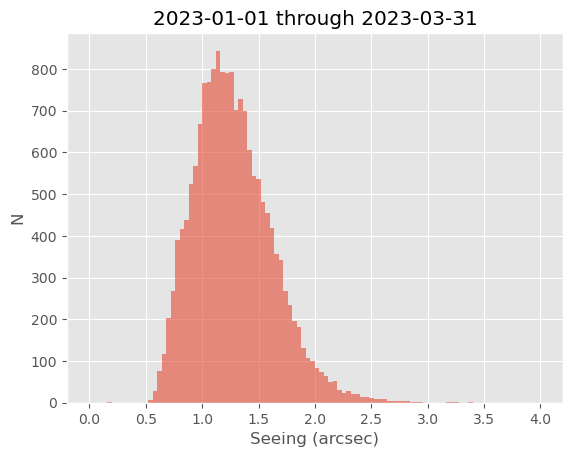

In [7]:
# make raw histogram of the zenith-corrected seeing column
fig = plt.figure(figsize=(8, 5))
fixed.hist(column='seeing', bins=100, range=(0.0, 4.0), alpha=0.6)
with plt.style.context('ggplot'):
    plt.title("2023-01-01 through 2023-03-31")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.show()

In [8]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(fixed['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(fixed['seeing'])
fit_median = exp_mu + loc

0.24381691538978106 -0.1288767990577409 1.3644619698017735


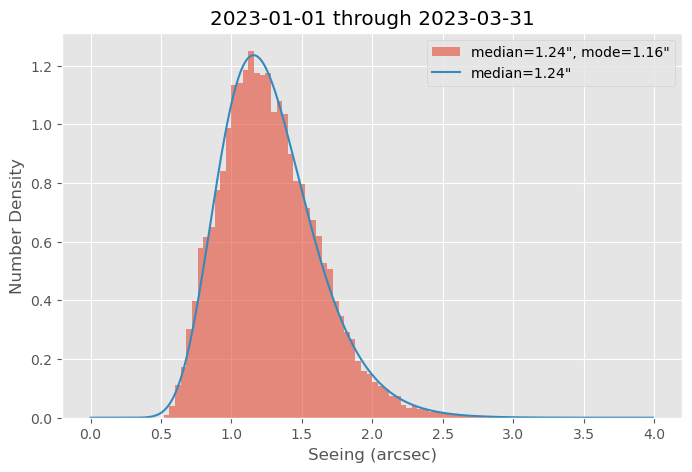

In [9]:
# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(fixed['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("2023-01-01 through 2023-03-31")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2023q1_hist.png")
plt.show()

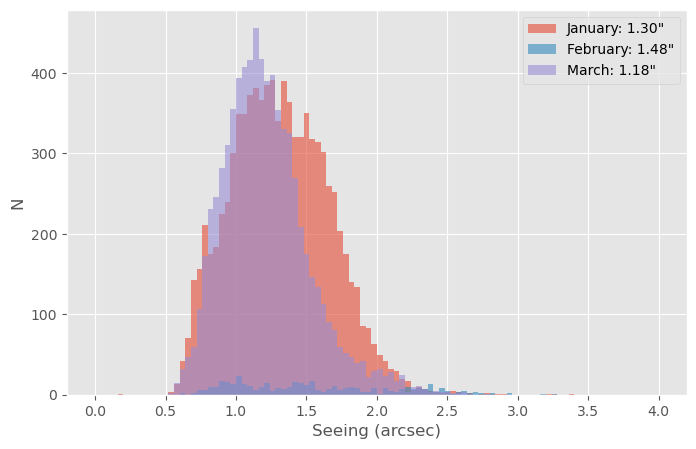

In [10]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
months = {}
legends = []
months['January'] = fixed.loc['2023-01']
months['February'] = fixed.loc['2023-02']
months['March'] = fixed.loc['2023-03']
for m in months:
    plt.hist(months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2023q1_monthly.png")
plt.show()

In [11]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = fixed.between_time(start_time='00:00', end_time='07:00')
second_half = fixed.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

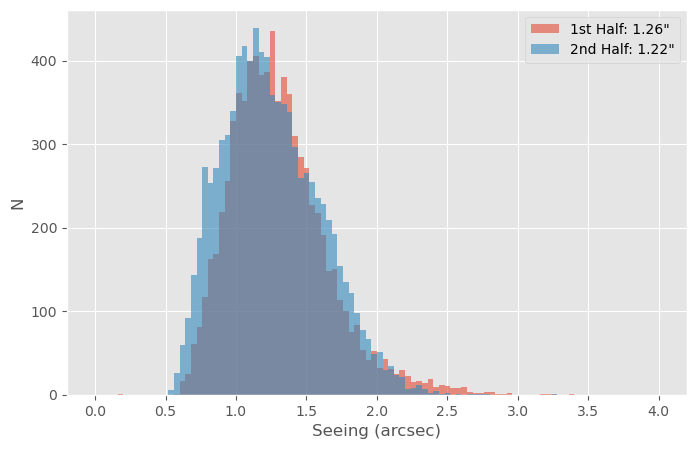

In [12]:
# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2023q1_1st2nd.png")
plt.show()

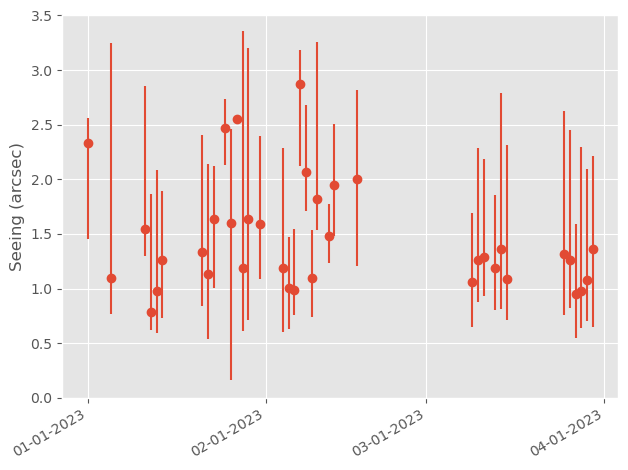

In [13]:
import matplotlib.dates as mdates

# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = fixed.seeing.resample('D').median()
daily['max'] = fixed.seeing.resample('D').max()
daily['min'] = fixed.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2023q1_nightly.png")
plt.show()

In [14]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(fixed.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

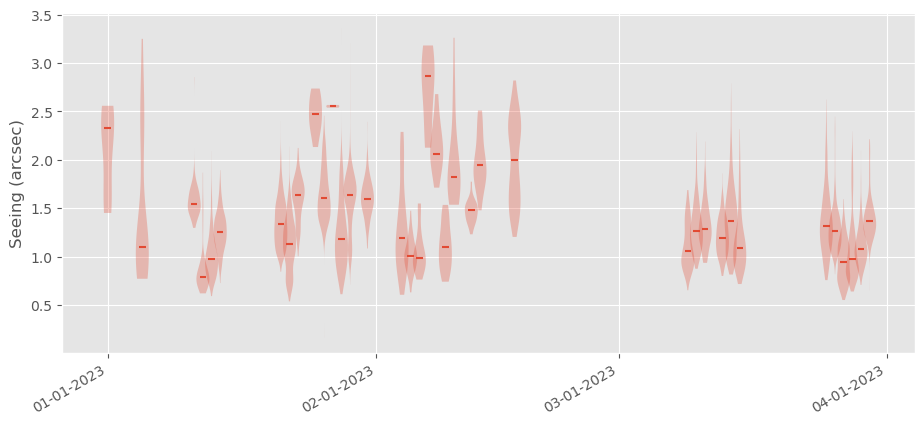

In [15]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2023q1_violin.png")
    plt.show()

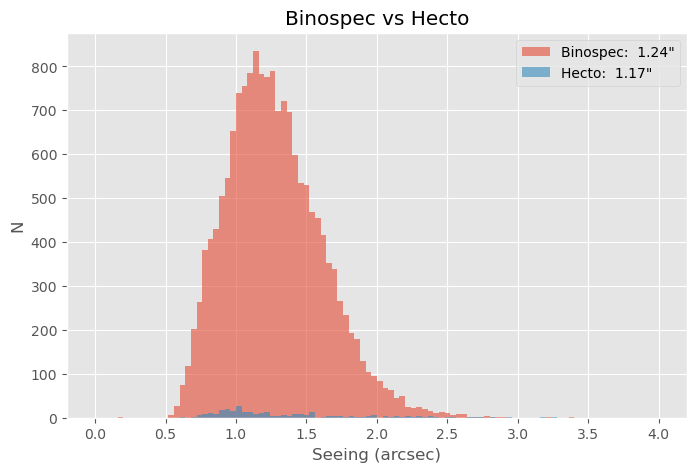

In [16]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8, 5))
    medb = np.median(fixed['seeing'][fixed['wfs'] == 'binospec'])
    #medm = np.median(fixed['seeing'][fixed['wfs'] == 'newf9'])
    medf = np.median(fixed['seeing'][fixed['wfs'] == 'f5'])
    plt.hist(fixed['seeing'][fixed['wfs'] == 'binospec'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"Binospec: {medb: .2f}\"")
    #plt.hist(fixed['seeing'][fixed['wfs'] == 'newf9'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"F/9: {medm: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'f5'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"Hecto: {medf: .2f}\"")
    plt.legend()
    plt.title("Binospec vs Hecto")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.savefig("bino_vs_hecto_2023q1.png")
plt.show()

In [17]:
from minicyclop.io import read_seeing_data

In [18]:
cyclop = read_seeing_data(Path.home() / "MMT/minicyclop/data/MiniCyclop/Data/Seeing_Data.txt")

In [19]:
cyclop

,UT,flux,seeing,r0,isot,epoch_ms
ut,,,,,,
2022-06-08 03:32:32,6/8/2022 3:32:32 AM,2733.7,0.84,135.8,2022-06-08T03:32:32.968,1654659152968
2022-06-08 03:33:27,6/8/2022 3:33:27 AM,2755.7,0.84,134.4,2022-06-08T03:33:27.409,1654659207408
2022-06-08 03:34:23,6/8/2022 3:34:23 AM,2801.6,2.38,47.7,2022-06-08T03:34:23.655,1654659263655
2022-06-08 03:35:16,6/8/2022 3:35:16 AM,2853.2,1.01,112.3,2022-06-08T03:35:16.325,1654659316324
2022-06-08 03:36:00,6/8/2022 3:36:00 AM,2739.0,1.03,110.7,2022-06-08T03:36:00.691,1654659360691
...,...,...,...,...,...,...
2023-04-17 12:28:35,4/17/2023 12:28:35 PM,1629.9,1.07,106.4,2023-04-17T12:28:35.861,1681734515860
2023-04-17 12:29:28,4/17/2023 12:29:28 PM,1654.6,1.06,107.3,2023-04-17T12:29:28.824,1681734568824
2023-04-17 12:30:23,4/17/2023 12:30:23 PM,1669.0,1.09,104.3,2023-04-17T12:30:23.990,1681734623990


In [20]:
cyclop_q1 = cyclop[(cyclop.index >= '2023-01-01') & (cyclop.index < '2023-04-01')]

In [22]:
cyclop_q1

,UT,flux,seeing,r0,isot,epoch_ms
ut,,,,,,
2023-01-01 00:55:30,1/1/2023 12:55:30 AM,573.7,1.65,68.8,2023-01-01T00:55:30.539,1672534530538
2023-01-01 00:56:36,1/1/2023 12:56:36 AM,688.3,1.71,66.2,2023-01-01T00:56:36.298,1672534596297
2023-01-01 00:57:35,1/1/2023 12:57:35 AM,691.3,1.36,83.2,2023-01-01T00:57:35.732,1672534655732
2023-01-01 00:59:15,1/1/2023 12:59:15 AM,553.8,2.05,55.2,2023-01-01T00:59:15.567,1672534755567
2023-01-01 01:00:16,1/1/2023 1:00:16 AM,645.6,1.87,60.7,2023-01-01T01:00:16.946,1672534816945
...,...,...,...,...,...,...
2023-03-31 12:50:10,3/31/2023 12:50:10 PM,1017.5,0.88,128.3,2023-03-31T12:50:10.107,1680267010106
2023-03-31 12:51:02,3/31/2023 12:51:02 PM,1102.1,0.97,116.4,2023-03-31T12:51:02.500,1680267062499
2023-03-31 12:51:54,3/31/2023 12:51:54 PM,1035.4,0.96,117.8,2023-03-31T12:51:54.608,1680267114607


0.6255315387536093 0.47139540946794556 0.7087817478875633


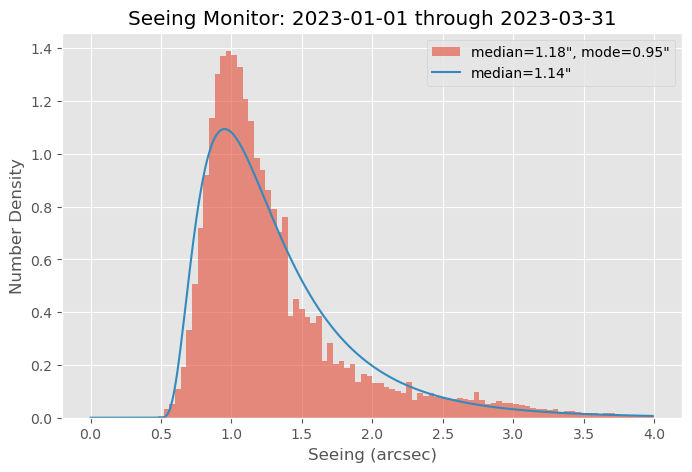

In [23]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(cyclop_q1['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(cyclop_q1['seeing'])
fit_median = exp_mu + loc

# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(cyclop_q1['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("Seeing Monitor: 2023-01-01 through 2023-03-31")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2023q1_cyclop_hist.png")
plt.show()

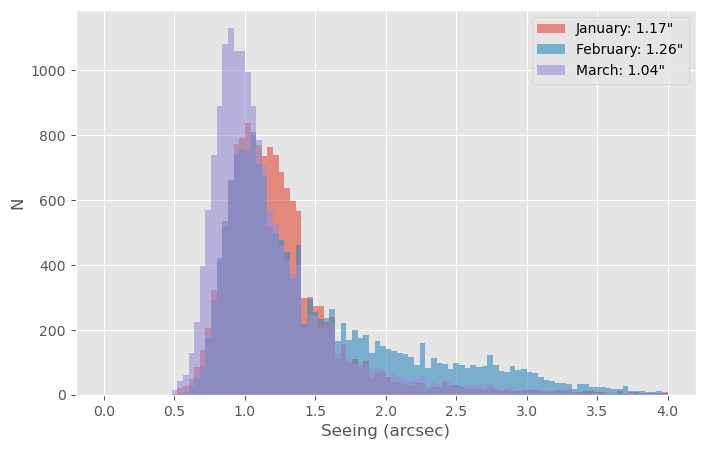

In [24]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
cyc_months = {}
legends = []
cyc_months['January'] = cyclop_q1.loc['2023-01']
cyc_months['February'] = cyclop_q1.loc['2023-02']
cyc_months['March'] = cyclop_q1.loc['2023-03']
for m in months:
    plt.hist(cyc_months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(cyc_months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2023q1_cyclop_monthly.png")
plt.show()

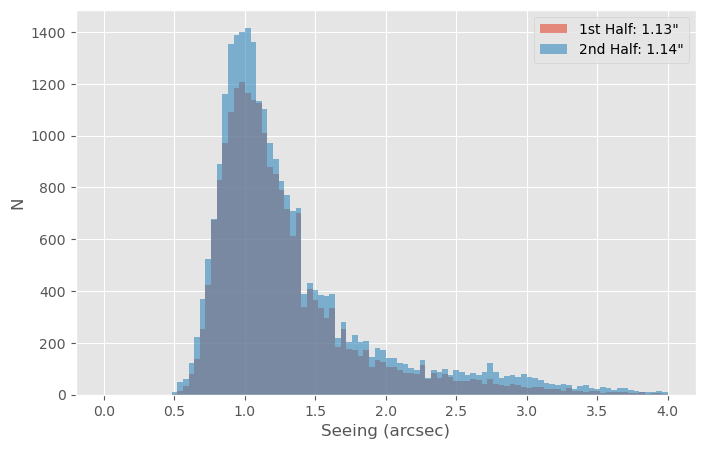

In [25]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = cyclop_q1.between_time(start_time='00:00', end_time='07:00')
second_half = cyclop_q1.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2023q1_cyclop_1st2nd.png")
plt.show()

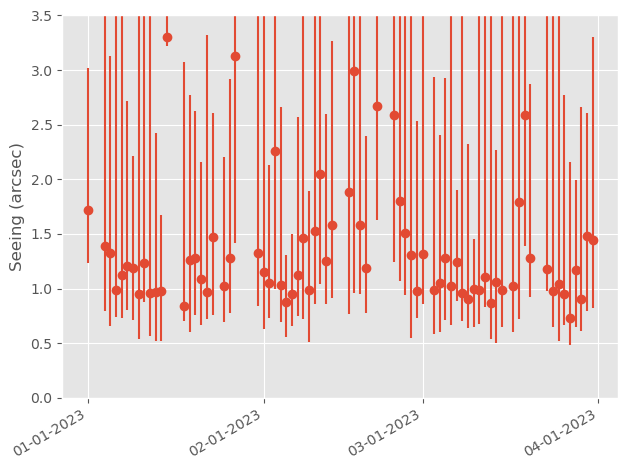

In [26]:
# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = cyclop_q1.seeing.resample('D').median()
daily['max'] = cyclop_q1.seeing.resample('D').max()
daily['min'] = cyclop_q1.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2023q1_cyclop_nightly.png")
plt.show()

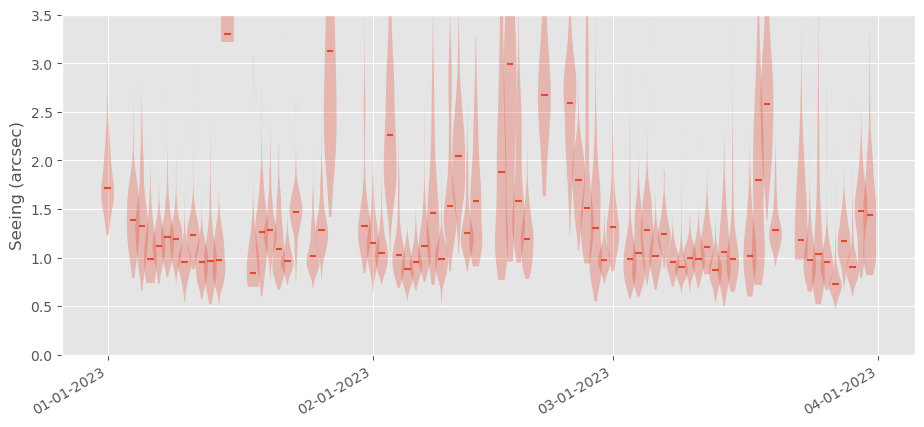

In [27]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(cyclop_q1.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    ax.set_ylim(0.0, 3.5)
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2023q1_cyclop_violin.png")
    plt.show()

In [28]:
#f9 = fixed[fixed['wfs'] == 'newf9']
bino = fixed[fixed['wfs'] == 'binospec']
hecto = fixed[fixed['wfs'] == 'f5']

In [29]:
#f9_dates = sorted(list(set(f9.index.strftime('%Y-%m-%d'))))
bino_dates = sorted(list(set(bino.index.strftime('%Y-%m-%d'))))
hecto_dates = sorted(list(set(hecto.index.strftime('%Y-%m-%d'))))
bino_dates, hecto_dates

(['2023-01-11',
  '2023-01-12',
  '2023-01-13',
  '2023-01-14',
  '2023-01-21',
  '2023-01-22',
  '2023-01-23',
  '2023-01-25',
  '2023-01-26',
  '2023-01-27',
  '2023-01-28',
  '2023-01-29',
  '2023-01-31',
  '2023-02-17',
  '2023-03-09',
  '2023-03-10',
  '2023-03-11',
  '2023-03-13',
  '2023-03-14',
  '2023-03-15',
  '2023-03-25',
  '2023-03-26',
  '2023-03-27',
  '2023-03-28',
  '2023-03-29',
  '2023-03-30'],
 ['2023-01-01',
  '2023-01-05',
  '2023-02-04',
  '2023-02-05',
  '2023-02-06',
  '2023-02-07',
  '2023-02-08',
  '2023-02-09',
  '2023-02-10',
  '2023-02-12',
  '2023-02-13'])

In [30]:
#cyc_f9 = np.hstack([np.array(cyclop_q4.loc[date]['seeing']) for date in f9_dates])
cyc_bino = np.hstack([np.array(cyclop_q1.loc[date]['seeing']) for date in bino_dates])
cyc_hecto = np.hstack([np.array(cyclop_q1.loc[date]['seeing']) for date in hecto_dates])

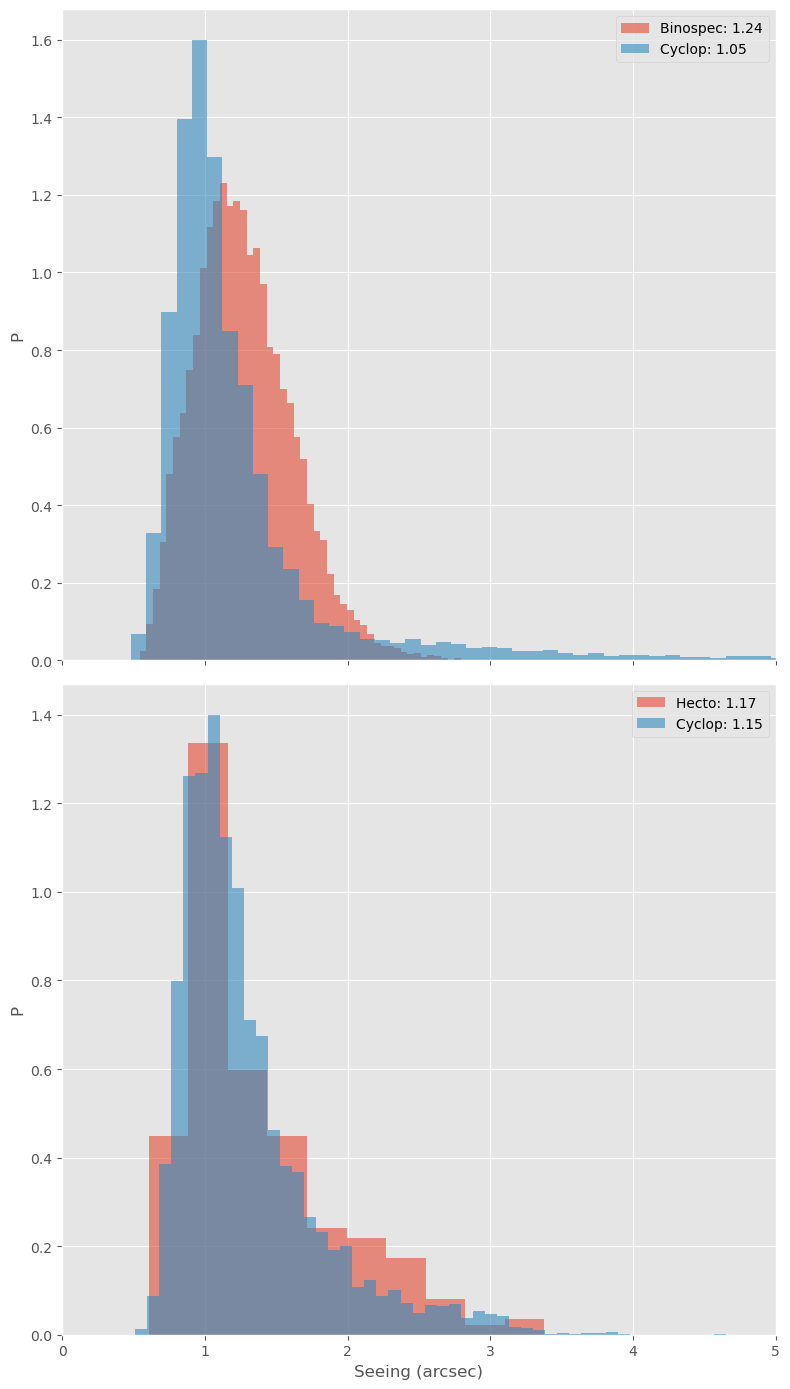

In [34]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(2, 1, figsize=(8, 14), sharex=True)
    fig.subplots_adjust(hspace=0)
    
    hist(bino['seeing'], bins='scott', ax=ax[0], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_bino, bins='scott', ax=ax[0], histtype='stepfilled', alpha=0.6, density=True)
    ax[0].legend([f"Binospec: {np.median(bino['seeing']):.2f}", f"Cyclop: {np.median(cyc_bino):.2f}"])
    ax[0].set_ylabel("P")

    hist(hecto['seeing'], bins='scott', ax=ax[1], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_hecto, bins='scott', ax=ax[1], histtype='stepfilled', alpha=0.6, density=True)
    ax[1].legend([f"Hecto: {np.median(hecto['seeing']):.2f}", f"Cyclop: {np.median(cyc_hecto):.2f}"])
    ax[1].set_xlim(0, 5)
    ax[1].set_xlabel("Seeing (arcsec)")
    ax[1].set_ylabel("P")
    plt.tight_layout()
    plt.savefig("2023q1_cyclop_vs_inst.png")
    plt.show()

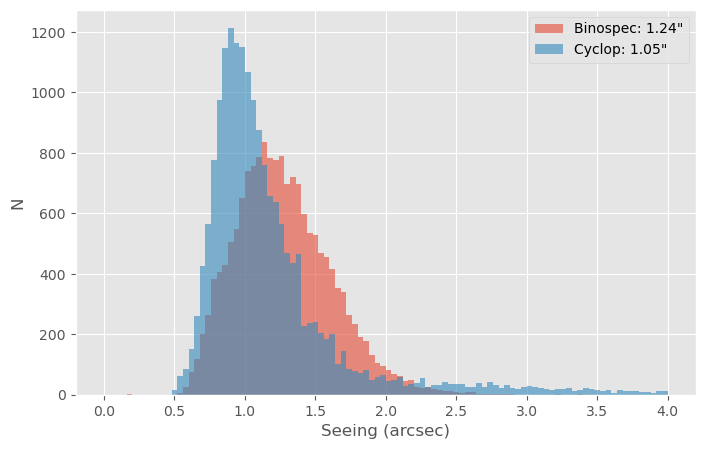

In [35]:
with plt.style.context('ggplot', after_reset=True):
    fig = plt.figure(figsize=(8, 5))
    plt.hist(bino['seeing'], bins=100, range=(0.0, 4.0), label="MMIRS", alpha=0.6)
    plt.hist(cyc_bino, bins=100, range=(0.0, 4.0), label="Cyclop", alpha=0.6)
    plt.legend(["Binospec: %.2f\"" % np.median(bino['seeing']), "Cyclop: %.2f\"" % np.median(cyc_bino)])
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
    plt.savefig("2023q1_cyclop_bino.png")
    plt.show()